# Min-max

In [1]:
from math import prod
import numpy as np
from trainsum.numpy import trainsum as ts
import matplotlib.pyplot as plt

def print_memory_savings(shape: ts.TrainShape):
    """Print the memory savings defined by the TrainShape."""
    full_numel = prod(dim.size() for dim in shape.dims)
    approx_numel = 0
    for i in range(len(shape)):
        approx_numel += prod(shape.middle(i)) * shape.left_rank(i) * shape.right_rank(i)
    print(f"memory savings: {100-100*approx_numel/full_numel:.2f}%")

In [2]:
# define the data domain
dim = ts.dimension(2**15)
x = np.linspace(0.0, 100.0, dim.size())

# create the data as gauss shaped functions
data = np.zeros_like(x)
for i in range(50):
    fac = np.random.rand() * 10.0
    off = np.random.randint(0, 100)
    width = np.random.randint(1, 100)
    data += fac*np.exp(-width*(x-off)**2)
    
# add some noise
data += np.random.rand(*data.shape) * 0.1

In [3]:
# approximate the data variationally
shape = ts.trainshape(*data.shape)
with ts.variational(max_rank=32, ncores=2, nsweeps=2):
    train = ts.tensortrain(shape, data)
print_memory_savings(train.shape)

memory savings: 60.42%


In [4]:
# use the min_max function to approximate the minimum and maximum values of the data
res = ts.min_max(train, 8)

# compare the result against the reference
print(f"approx min: val={res.min_val:.2E}, idxs={res.min_idxs[0,0]}")
print(f" exact min: val={np.min(data):.2E}, idxs={np.argmin(data)}")
print("-------")
print(f"approx max: val={res.max_val:.2E}, idxs={res.max_idxs[0,0]}")
print(f" exact max: val={np.max(data):.2E}, idxs={np.argmax(data)}")

approx min: val=1.49E-02, idxs=4437
 exact min: val=1.32E-06, idxs=26570
-------
approx max: val=1.86E+01, idxs=2295
 exact max: val=1.86E+01, idxs=2294


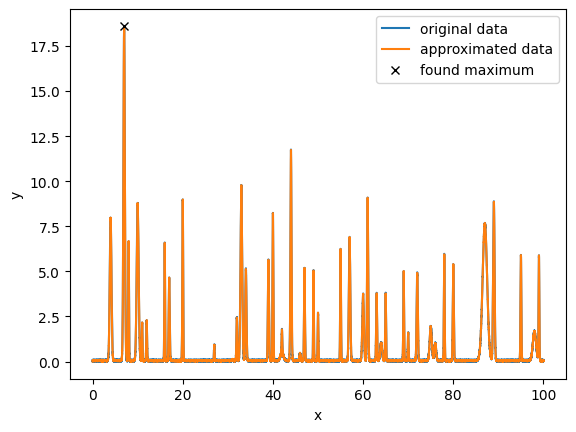

In [5]:
# plot the data and 
plt.figure()
plt.plot(x, data, label="original data")
plt.plot(x, train.to_tensor(), label="approximated data")
plt.plot([x[*res.max_idxs]], [res.max_val], marker="x", linestyle="", color="black", label="found maximum")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()